In [1]:
import numpy as np
# numpy libraries support scientific calculation and also used to perform  numerical operations 
import pandas as pd
# pandas are more powerfull libraries that are usefull for data visualization and manipulation
import matplotlib.pyplot as plt
# matplot provides plotting tools for data visualization and 
import seaborn as sns
# seaborn is used for high level interface for drawing attractive and informative statistical graphics 
from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn.cluster import KMeans
# importing the kmeans algoritmn


In [2]:
df=pd.read_csv("new.csv")
# reading the csv data file 
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
df.shape
# used to print total rows and columns in that file,i.e 2240 rows and 29 columns

(2240, 29)

In [4]:
df.info()
# info is used for retriving basic information of the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe().T
# basic arthematic operations that has been calculated

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [6]:
# df['Accepted']=df['Accepted'].str.replace('Accepted','')

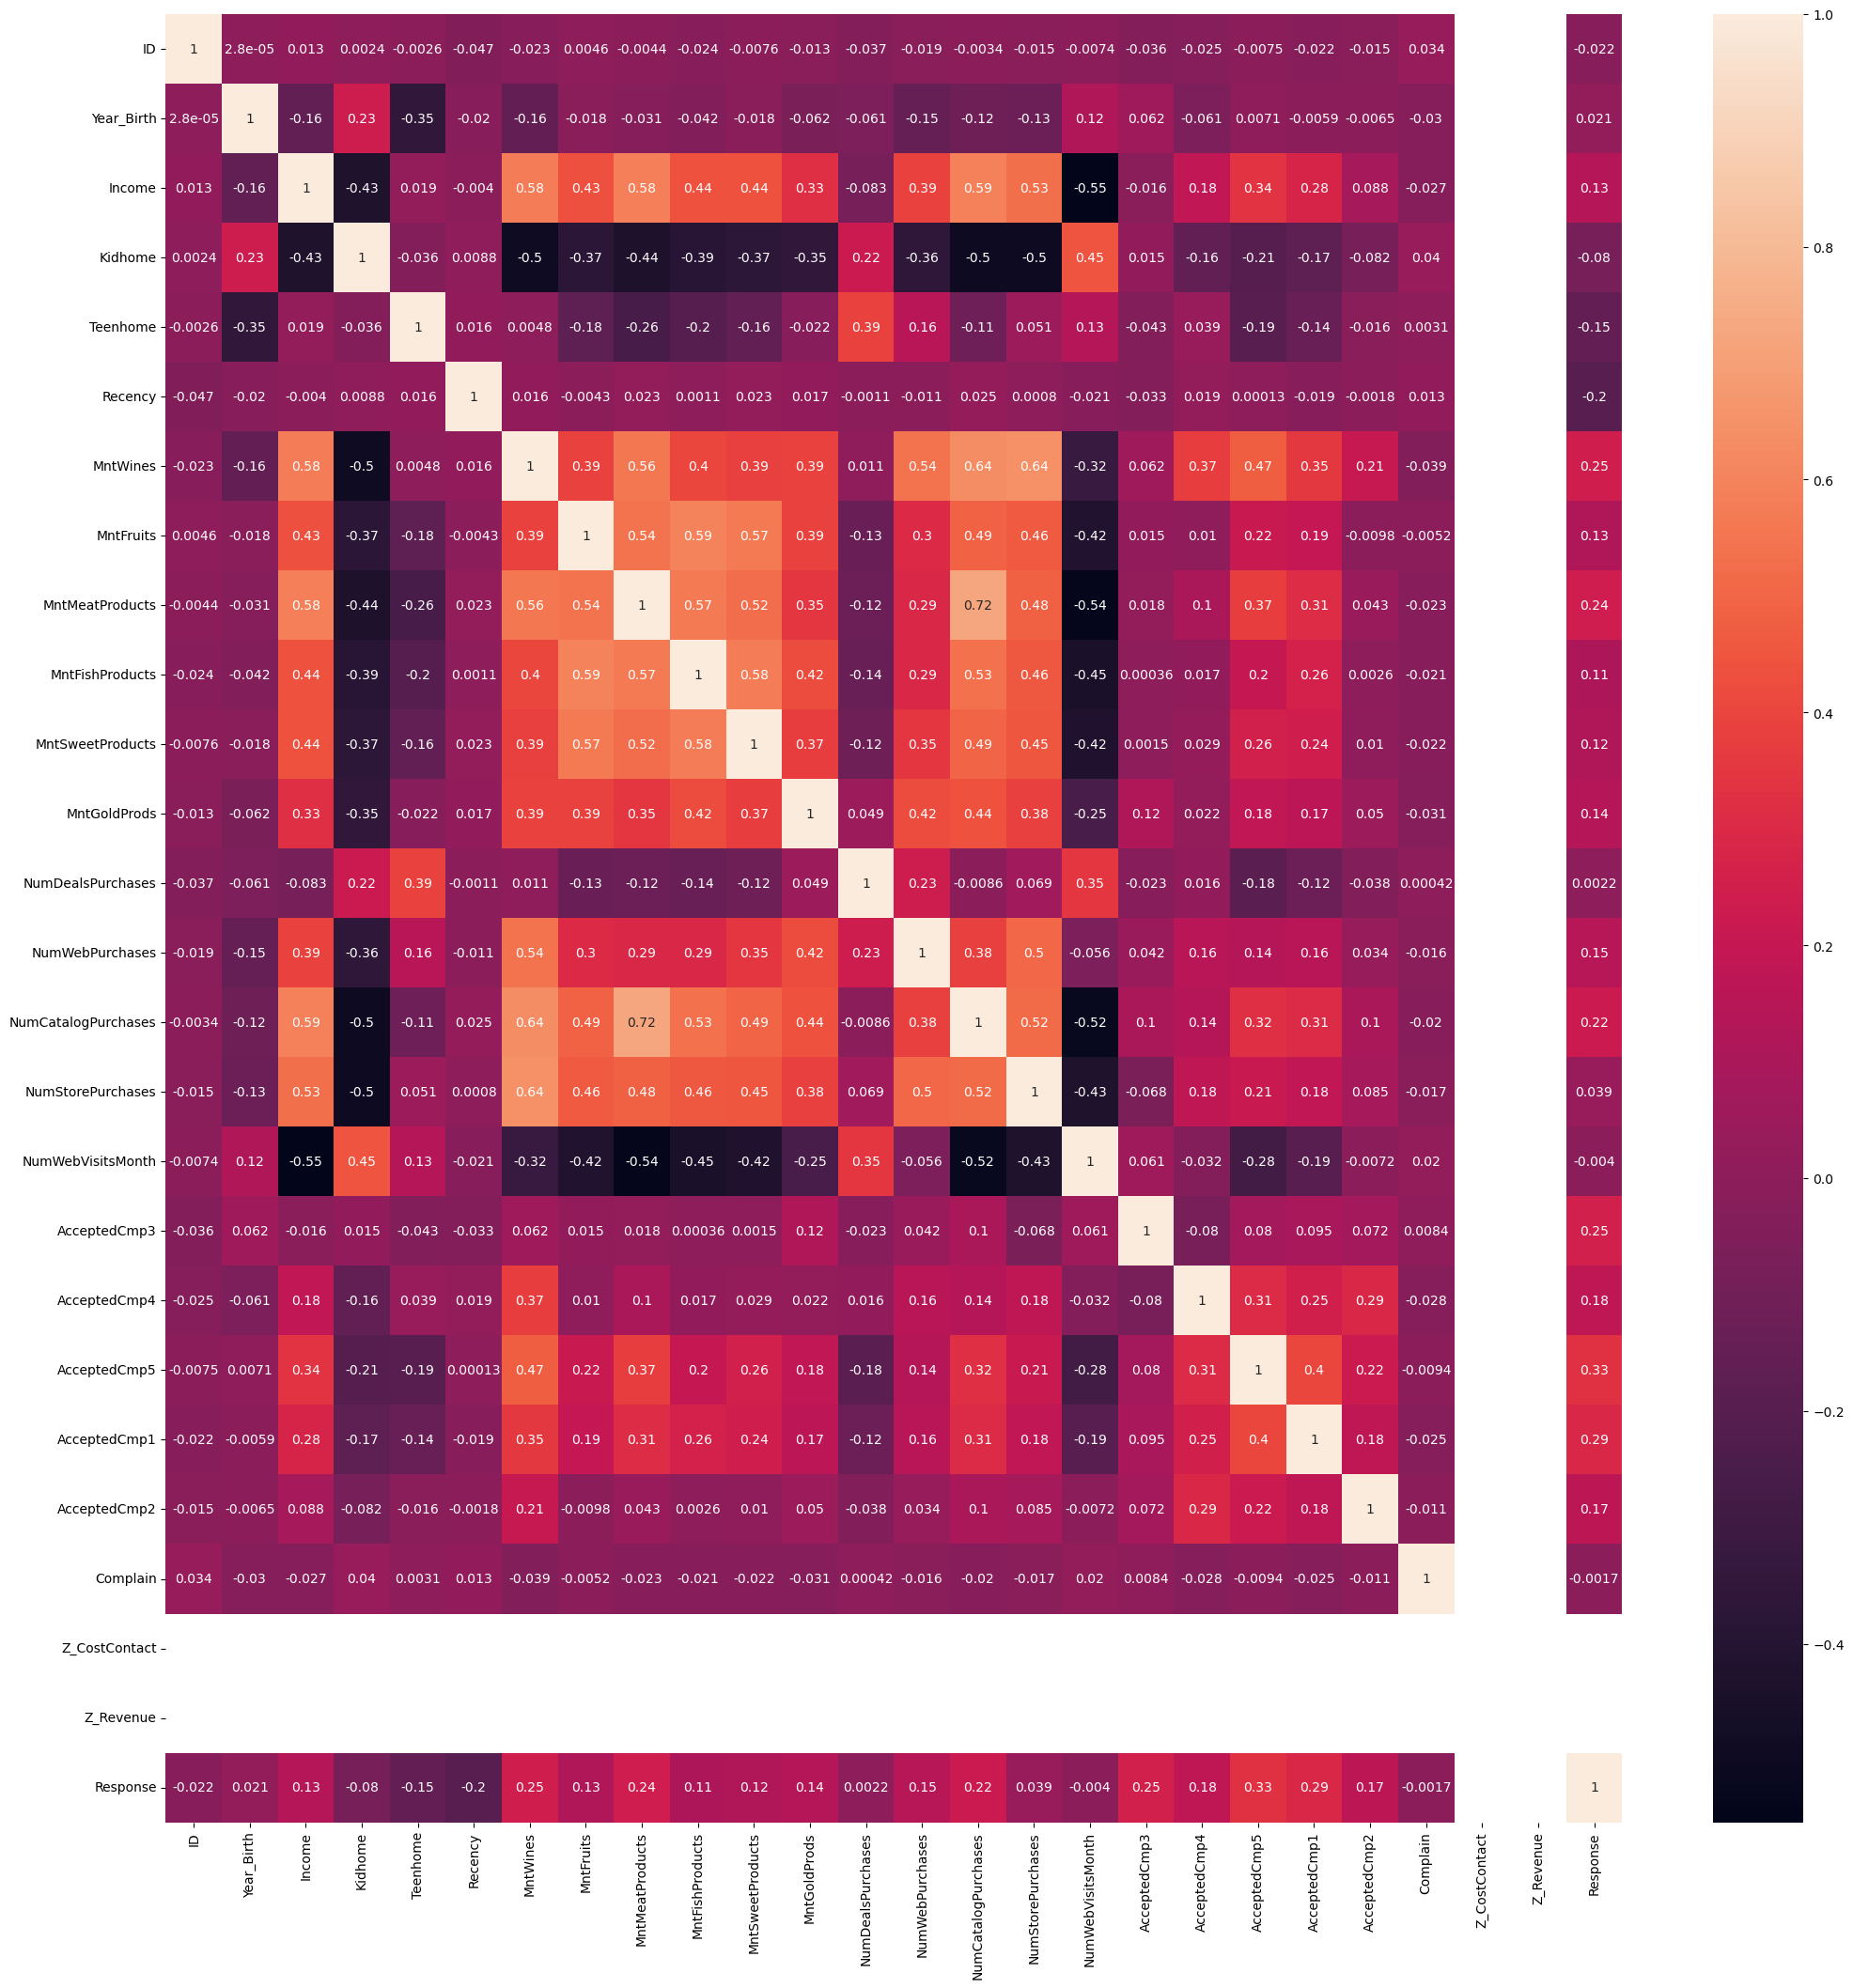

In [7]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()
# we can see the none of column are co related using heatmap

In [8]:
df.isnull().sum()
# to check sum of null values in the columns

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
x=df.dropna(inplace=True)
# dropping the null values
print(x)

None


In [10]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [11]:
df.nunique()
# to check the presence of the null values in the data

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [12]:
parts=df['Dt_Customer'].str.split("-",n=3,expand=True)
# using - as a delimiter to split the dates
df['day']=parts[0].astype('int')
df['month']=parts[1].astype('int')
df['year']=parts[2].astype('int')
# since the model doesnt understand dates hence the dates are split on based of day,month and year
print(parts)

       0   1     2
0     04  09  2012
1     08  03  2014
2     21  08  2013
3     10  02  2014
4     19  01  2014
...   ..  ..   ...
2235  13  06  2013
2236  10  06  2014
2237  25  01  2014
2238  24  01  2014
2239  15  10  2012

[2216 rows x 3 columns]


In [13]:
df.drop(['Dt_Customer','Z_Revenue','Z_CostContact'],axis=1,inplace=True)
# dropping the columns since its not that important


In [30]:
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,day,month,year
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,0,0,0,0,0,0,1,4,9,2012
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,0,0,0,0,0,0,0,8,3,2014
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,0,0,0,0,0,0,0,21,8,2013
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,0,0,0,0,0,0,0,10,2,2014
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,0,0,0,0,0,0,0,19,1,2014


In [36]:
floats,objects=[],[]
# create two empty lists for seperating float and object variable 
for col in df.columns:
    if df[col].dtype==object:
        objects.append(col)
#seperating object data type and adding that to that list 
    elif df[col].dtype==float:
        floats.append(col)
#seperating object data type and adding that to that float 
print(objects)
print(floats)

['Education', 'Marital_Status']
['Income']


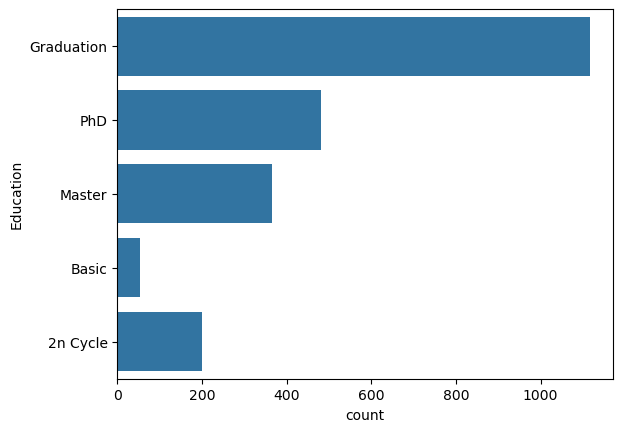

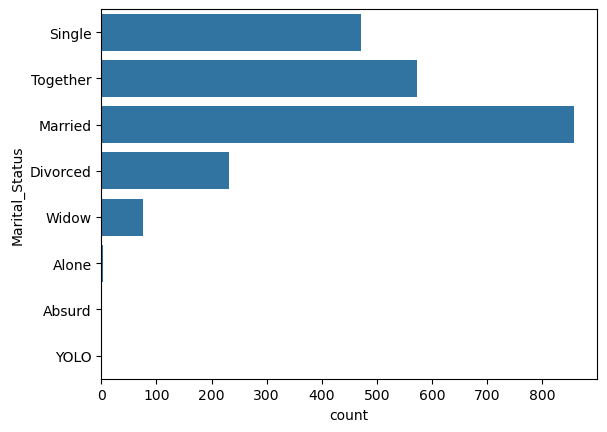

In [56]:
sns.countplot(df['Education'])
plt.show()
#plotting countplot of object column education
sns.countplot(df['Marital_Status'])
plt.show()
# plotting countplot of object marital_status

In [54]:
df['Marital_Status'].value_counts()
# Counting the values in Martial_status column

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

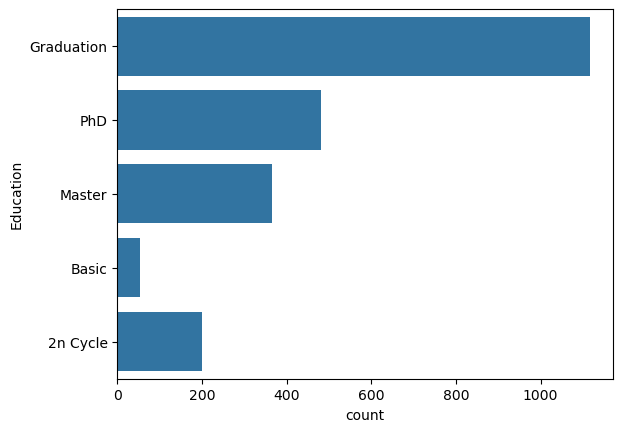

In [112]:
sns.countplot(df['Education'])
# plotting a count plot with respect to education.
plt.show()

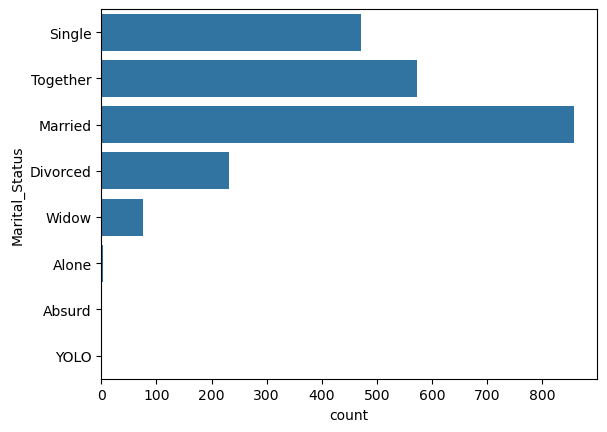

In [114]:
sns.countplot(df['Marital_Status'])
# plotting a countplot with respect to martial_status
plt.show()

In [122]:
for col in df.columns:
    if df[col].dtype==object:
     le=LabelEncoder()
# applying a label encoder 
     df[col]=le.fit_transform(df[col])
 

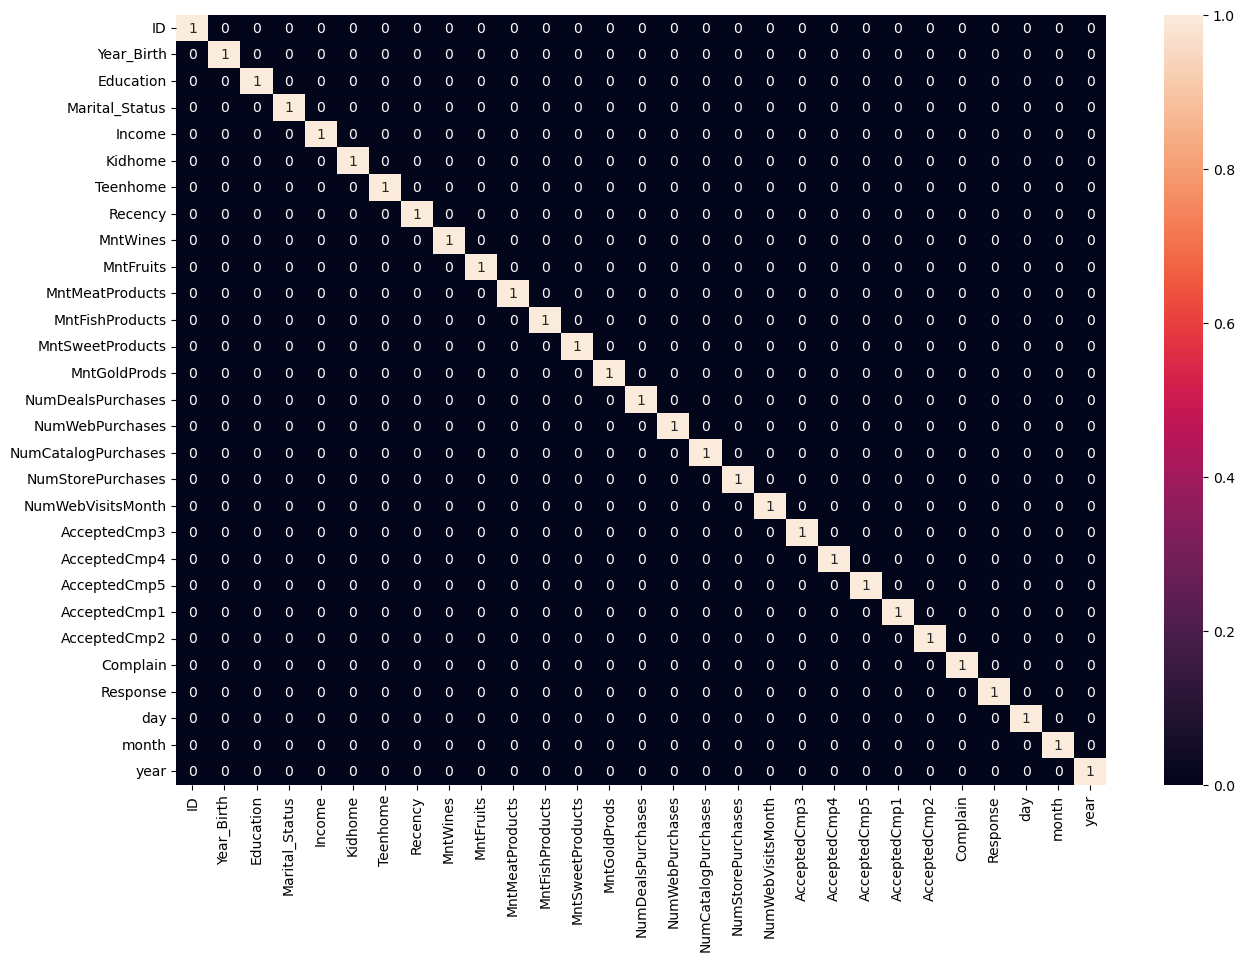

In [128]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr()>0.8,annot=True)
plt.show()
# plotting a heatmap to find the correlation

In [140]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data=scaler.fit_transform(df)

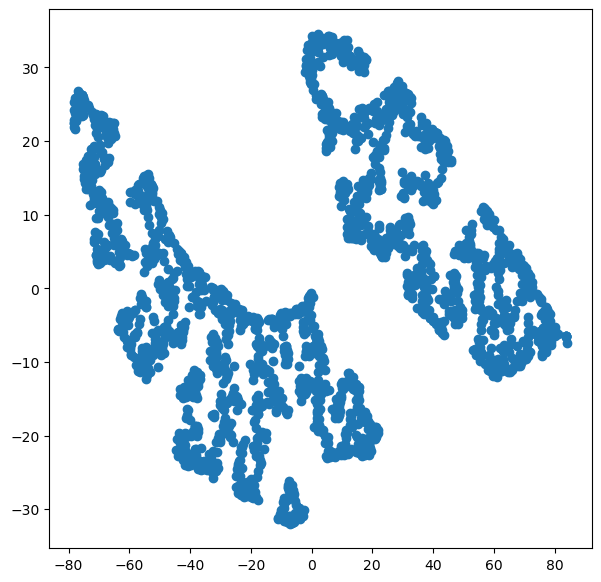

In [147]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2,random_state=0)
tsne_data=model.fit_transform(df)
plt.figure(figsize=(7,7))
plt.scatter(tsne_data[:,0],tsne_data[:,1])
plt.show()

In [149]:
error = []
for n_clusters in range(1, 21):
    model = KMeans(init='k-means++',
                   n_clusters=n_clusters,
                   max_iter=500,
                   random_state=22)
    model.fit(df)
    error.append(model.inertia_)


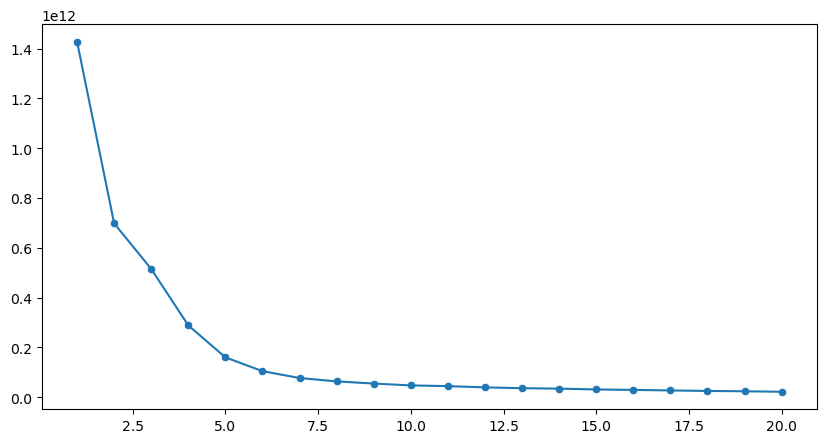

In [153]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 21), y=error)
sns.scatterplot(x=range(1, 21), y=error)
plt.show()


In [158]:
model = KMeans(init='k-means++',
               n_clusters=5,
               max_iter=500,
               random_state=22)
segments = model.fit_predict(df)


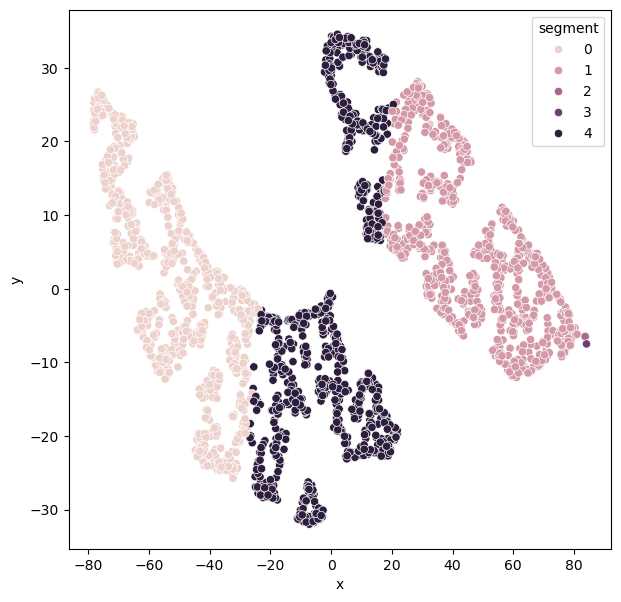

In [162]:
plt.figure(figsize=(7, 7))
# Create a DataFrame with the tsne_data and segments
df_tsne = pd.DataFrame({'x': tsne_data[:, 0], 'y': tsne_data[:, 1], 'segment': segments})
# Use the DataFrame in the scatterplot function
sns.scatterplot(x='x', y='y', hue='segment', data=df_tsne)
plt.show()
